# Gather Data

## Imports

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from config import MAIN_PALETTE

sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.rcParams["figure.figsize"] = (15,5)

## Get Data

In [57]:
data_path = '../data/dataset01.csv.csv'
data = pd.read_csv(data_path)

data.shape

(479, 1201)

#### Important info

In [58]:
na_values = data.isna()

print(f'Total NaN values: {na_values.sum().sum()}')

Total NaN values: 0


Check NaN values for each State

In [59]:
na_values['state'] = data['state']
na_values.groupby('state').sum().sum(axis=1)

state
0    0
1    0
2    0
dtype: int64

See which values are missing

In [60]:
# [print(x, i) for x, i in na_values.groupby('state').sum().sum()]
a = na_values.groupby('state').sum().sum()

for (index_, value) in zip(a.index, a):
    if value > 0:
        print(index_, value)

There is no recognizable pattern of which are the NaN values for now.
As there are very few NaN values, we will imput the mean values of each row into the missing values

In [61]:
def starts_curr(stri: str):
    return stri.startswith('current_')

def starts_volt(stri: str):
    return stri.startswith('volt_')

data['mean_curr'] = np.nanmean(data.iloc[:, 1: 1001], axis=1)
data['mean_volt'] = np.nanmean(data.iloc[:, 1001: 2001], axis=1)
    

In [62]:
target_columns = ['state', 'mean_curr', 'mean_volt']

df_filters = data.filter(items=target_columns)
df_filters.to_csv('../data/dataset_filtered.csv')

df_filters

,state,mean_curr,mean_volt
0,0,0.561500,0.425912
1,0,0.556151,0.424016
2,0,0.560638,0.416428
3,0,0.555654,0.428080
4,0,0.552916,0.432221
...,...,...,...
474,2,0.551222,0.396091
475,2,0.557202,0.405733
476,2,0.548423,0.398913
477,2,0.553375,0.395233


Check mean by state

In [63]:
df_filters.describe()

,state,mean_curr,mean_volt
count,479.000000,479.000000,479.000000
mean,0.594990,0.571805,0.364650
std,0.796735,0.026401,0.112440
min,0.000000,0.521921,0.100729
25%,0.000000,0.555386,0.386362
50%,0.000000,0.564310,0.418506
75%,1.000000,0.574589,0.428042
max,2.000000,0.650947,0.457934


In [64]:
df_0 = df_filters.query('state == 0').reset_index()
df_1 = df_filters.query('state == 1').reset_index()
df_2 = df_filters.query('state == 2').reset_index()

filtered_dfs = [df_0, df_1, df_2]
df_0

,index,state,mean_curr,mean_volt
0,0,0,0.561500,0.425912
1,1,0,0.556151,0.424016
2,2,0,0.560638,0.416428
3,3,0,0.555654,0.428080
4,4,0,0.552916,0.432221
...,...,...,...,...
283,283,0,0.535858,0.427142
284,284,0,0.536199,0.417303
285,285,0,0.534359,0.425142
286,286,0,0.538152,0.418445


Now, lets get some results from each state

In [65]:
## State 0
df_0.describe()

,index,state,mean_curr,mean_volt
count,288.000000,288.0,288.000000,288.000000
mean,143.500000,0.0,0.559631,0.426989
std,83.282651,0.0,0.009234,0.009389
min,0.000000,0.0,0.534327,0.409815
25%,71.750000,0.0,0.553648,0.420106
50%,143.500000,0.0,0.559288,0.426514
75%,215.250000,0.0,0.566805,0.432221
max,287.000000,0.0,0.578775,0.457934


In [66]:
## State 1
df_1.describe()

,index,state,mean_curr,mean_volt
count,97.000000,97.0,97.000000,97.000000
mean,336.000000,1.0,0.619456,0.148088
std,28.145456,0.0,0.011449,0.049618
min,288.000000,1.0,0.594283,0.100729
25%,312.000000,1.0,0.613367,0.111518
50%,336.000000,1.0,0.621285,0.118754
75%,360.000000,1.0,0.624799,0.197796
max,384.000000,1.0,0.650947,0.279864


In [67]:
## State 2
df_2.describe()

,index,state,mean_curr,mean_volt
count,94.000000,94.0,94.000000,94.000000
mean,431.500000,2.0,0.559934,0.397125
std,27.279418,0.0,0.014638,0.012289
min,385.000000,2.0,0.521921,0.380499
25%,408.250000,2.0,0.553797,0.386592
50%,431.500000,2.0,0.562796,0.396096
75%,454.750000,2.0,0.568833,0.402947
max,478.000000,2.0,0.587791,0.446695


Clearly, the current mean of state 0 and 2 are very similar while in state 0 the mean value of current is a little higher.

Lets check how are those values distributed in a Boxplot

[Text(0.5, 1.0, 'Distribution of average current')]

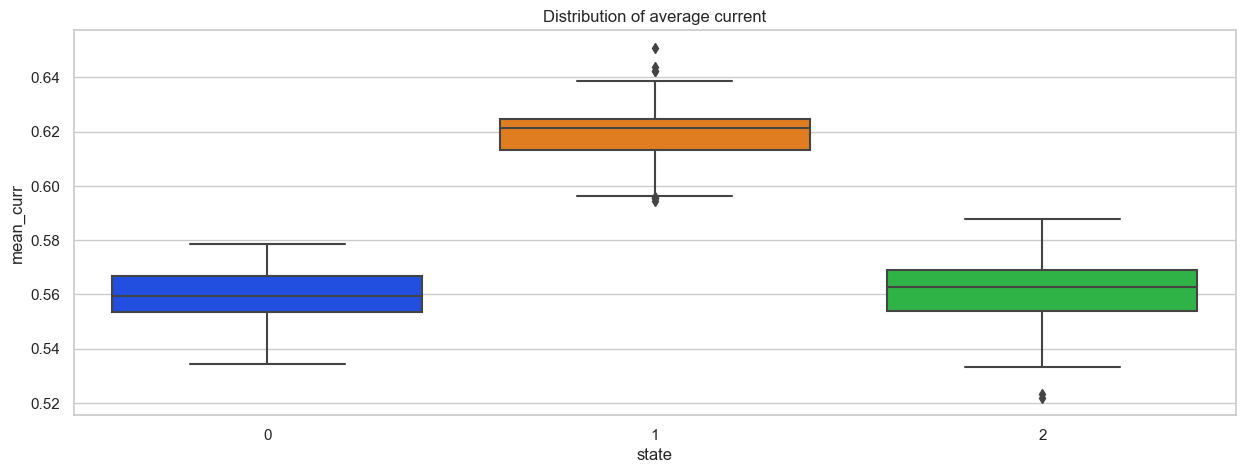

In [68]:
sns.boxplot(data=data, x="state", y="mean_curr").set(title=f'Distribution of average current')

The median of the mean values of current is lower in the state 0.

[Text(0.5, 1.0, 'Distribution of average voltage')]

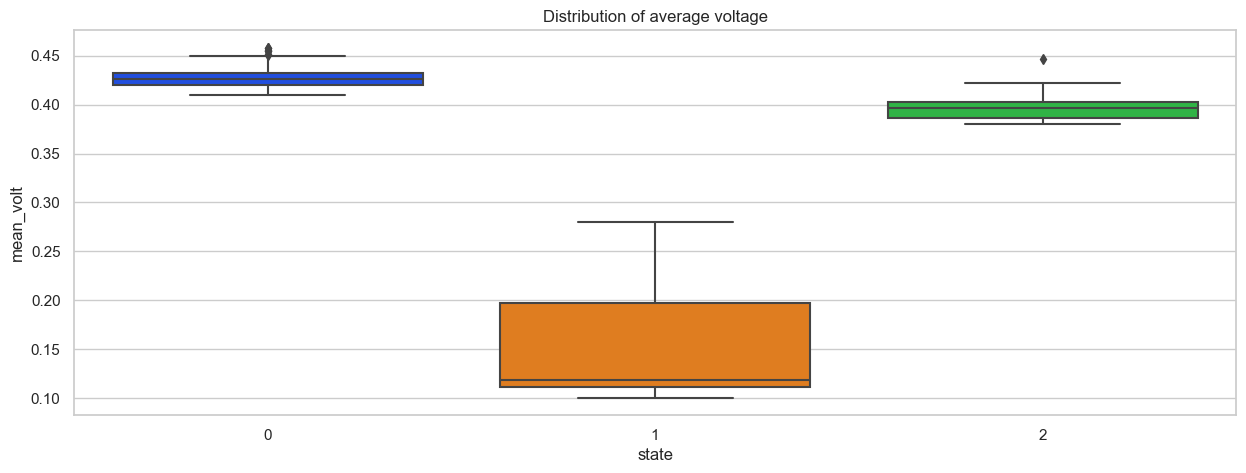

In [69]:
sns.boxplot(data=df_filters, x="state", y="mean_volt").set(title=f'Distribution of average voltage')

The median and the distribution of mean values for state 1 are very diferent from the others

Lets check how are those values distributed in a Histogram

In [70]:
def plot_hist_for_df(df):
    fig, axs = plt.subplots(ncols=2)
    column1 = df_filters.columns[1]
    column2 = df_filters.columns[2]
    sns.histplot(data=df, hue='state', x=column1, palette=MAIN_PALETTE, ax=axs[0])
    sns.histplot(data=df, hue='state', x=column2, palette=MAIN_PALETTE, ax=axs[1])
    plt.show()

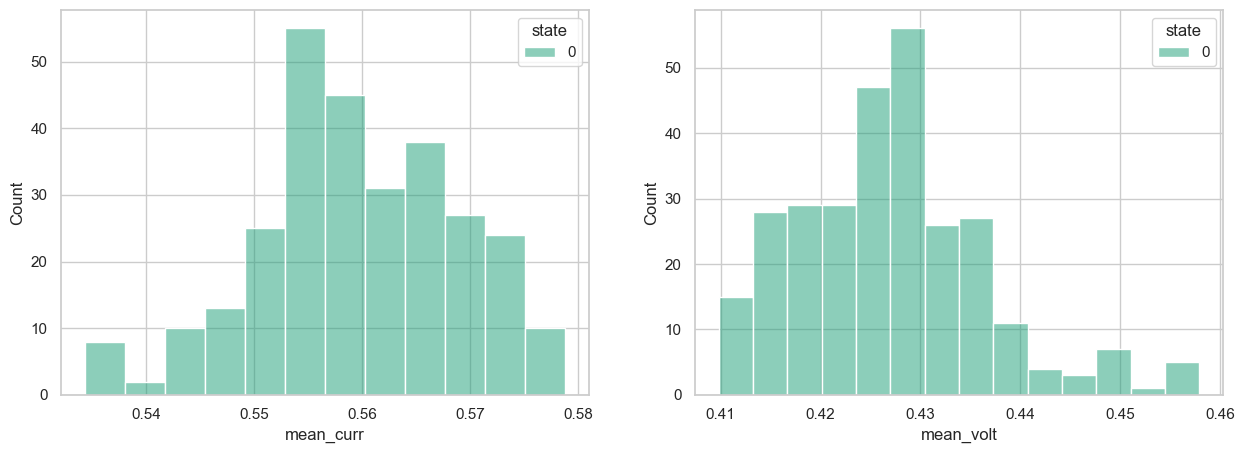

In [71]:
plot_hist_for_df(df_0)

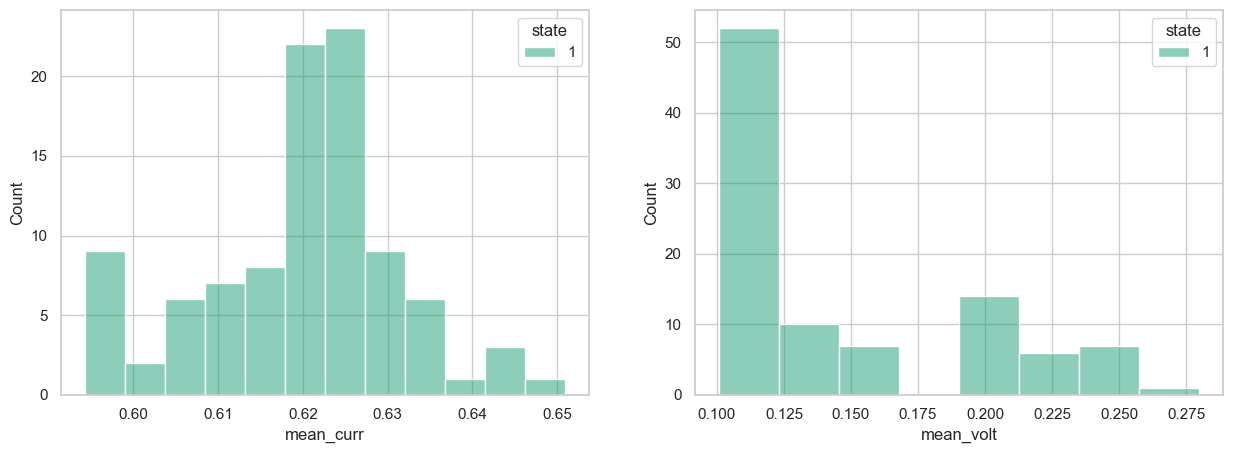

In [72]:
plot_hist_for_df(df_1)

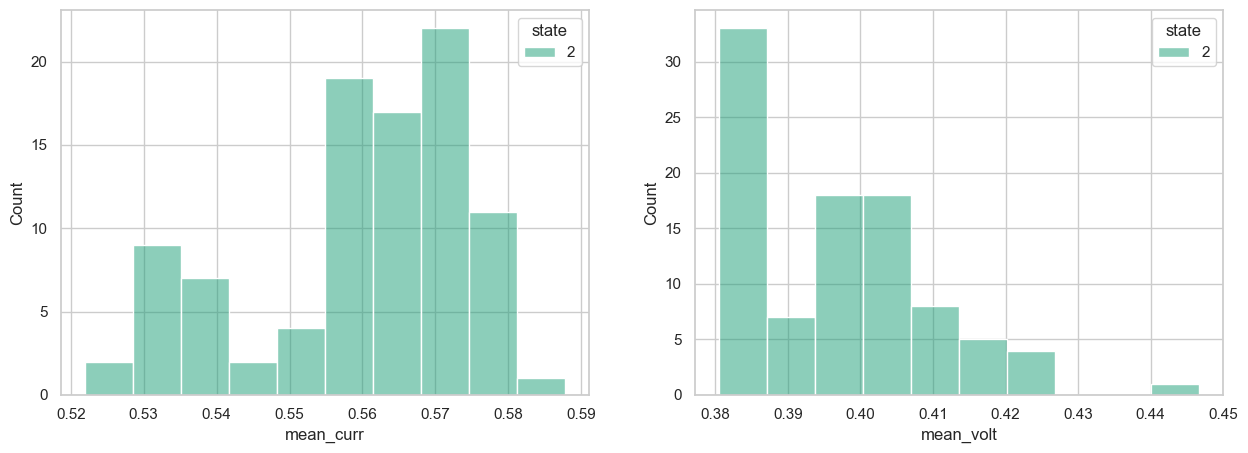

In [73]:
plot_hist_for_df(df_2)

All the histograms showed that the data is mainly centered in the median, with a very low frequency for other values.

Lets watch how the mean values are distributed along the dataset

<AxesSubplot: xlabel='mean_volt', ylabel='mean_curr'>

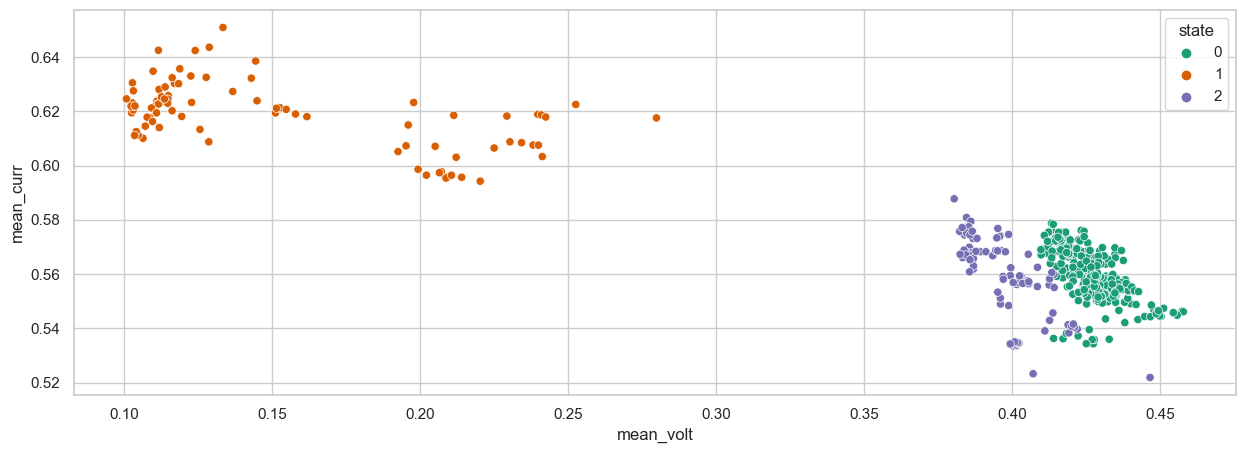

In [74]:
sns.scatterplot(data=df_filters, x="mean_volt", y="mean_curr", hue="state", palette=MAIN_PALETTE)

The 0 and 2 states are quite similar in this plot, while the state 1 is considerably different.
There is also an outlier for state 1, which will be removed through z-score in the next session.

Now, let's watch the behaviour of the features current and voltage for a single row of each state.

In [75]:
def behaviour_plot(state, target, init=1, final=1001, pace=1001):
    df_state = data.query(f'state == {state}').reset_index()
    row = df_state.iloc[5]

    df_print = {
        "current": list(row[init:final]),
        "volt": list(row[pace+init:pace+final]),
    }
    df_print = pd.DataFrame(df_print)
    fig, axs = plt.subplots(ncols=2)
    sns.lineplot(data=df_print[target], ax=axs[0]).set(title=f'State {state} - {target} Behaviour')
    sns.histplot(data=df_print, x=target, ax=axs[1]).set(title=f'State {state} - {target} Histogram')
    plt.show()
    # plt.clf()

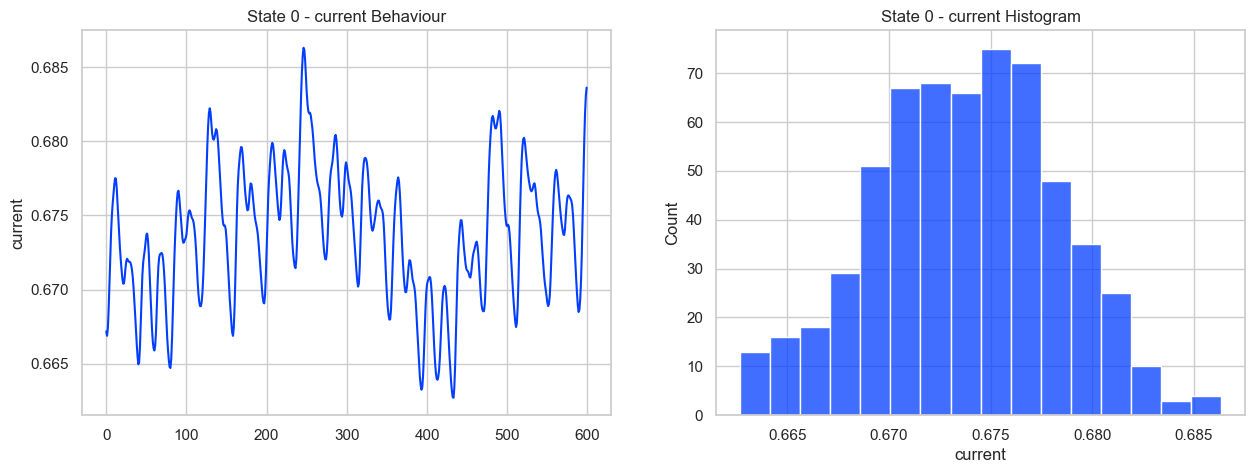

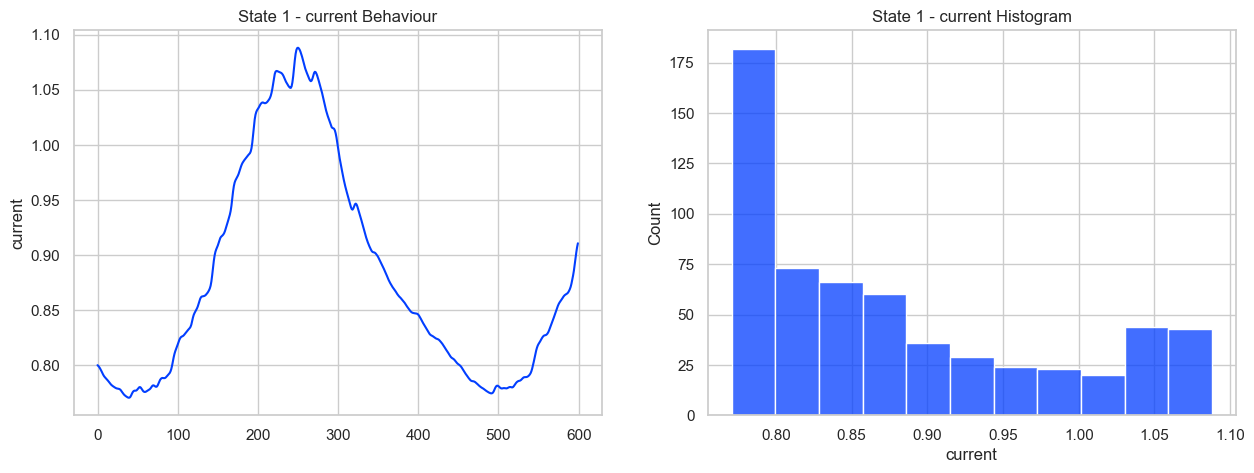

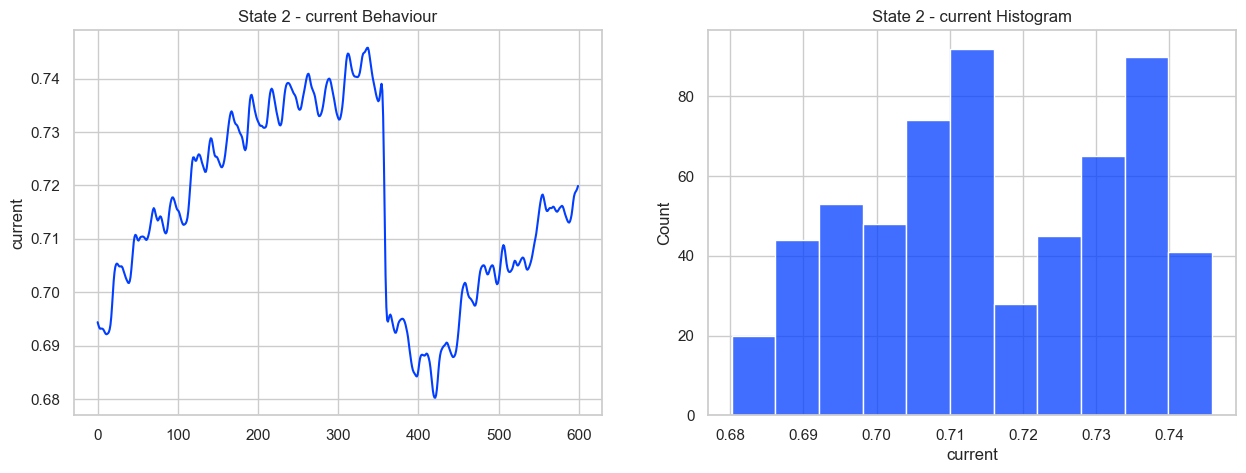

In [76]:
for state in range(3):
    # behaviour_plot(state, 'current')

The results showed a huge difference between the behaviours of the current for each state.

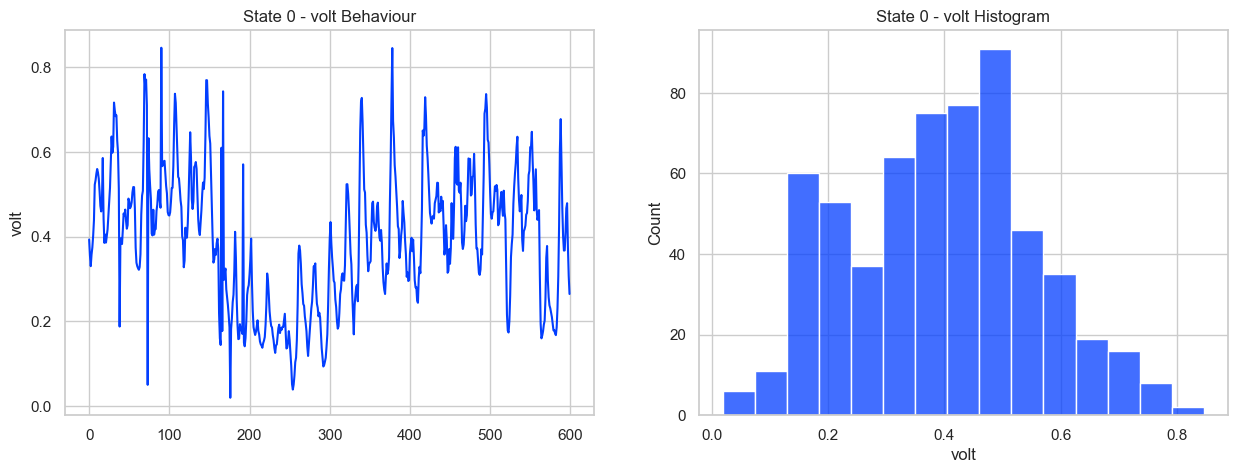

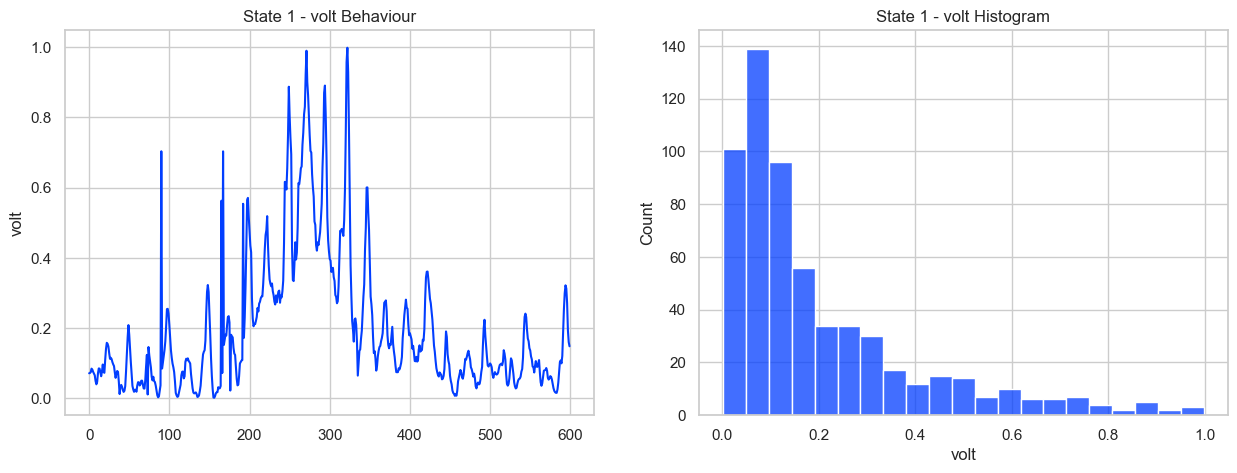

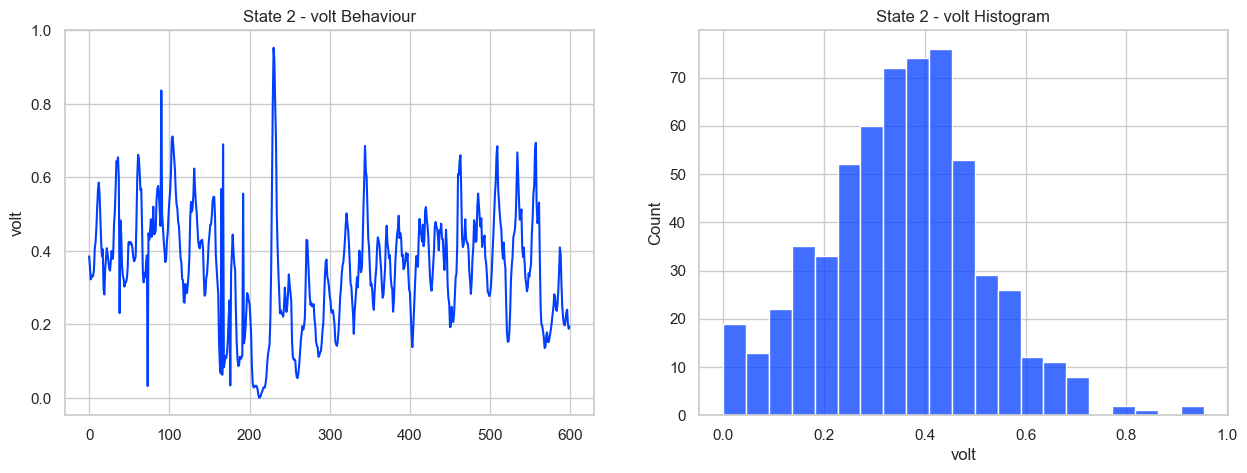

In [79]:
for state in range(3):
    # behaviour_plot(state, 'volt')

The results showed a huge difference between the behaviours of the voltage for each state.

Also, we concluded that there is a cycle in the behaviours. A max point and min point well defined, then the same behaviour again. Lets remove the initial and the end parts and choose only the 200 to 800 measurements.

In [78]:
for state in range(3):
    behaviour_plot(state, 'volt', init=200, final=800)

ValueError: All arrays must be of the same length

In [ ]:
for state in range(3):
    behaviour_plot(state, 'current', init=200, final=800)

     current_400  current_401  current_402  current_403  current_404  \
0       0.683199     0.681840     0.680580     0.679566     0.678792   
1       0.681533     0.681127     0.680993     0.681209     0.681714   
2       0.696028     0.695895     0.695802     0.695614     0.695303   
3       0.684462     0.685206     0.685659     0.685669     0.685290   
4       0.669144     0.668239     0.667531     0.667163     0.667237   
..           ...          ...          ...          ...          ...   
283     0.639965     0.638907     0.638158     0.638143     0.639987   
284     0.653785     0.652194     0.650473     0.648758     0.647104   
285     0.655425     0.657857     0.659371     0.660099     0.660035   
286     0.643534     0.645001     0.646956     0.648584     0.649436   
287     0.643730     0.647377     0.651344     0.654845     0.657277   

     current_405  current_406  current_407  current_408  current_409  ...  \
0       0.678327     0.678384     0.679113     0.680395   

The behaviour remained pretty different from each other and now the size of the problem is a lot less complex.